In [1]:
import sys
sys.path.insert(0, '..')
import time
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib notebook  
import numpy as np

from Configuration import Configuration
from MuscleSpindle import MuscleSpindle

In [2]:
conf = Configuration('confMuscleSpindle.rmto')

In [3]:
t = np.arange(0.0, conf.simDuration_ms, conf.timeStep_ms)
IaFR = np.zeros([len(t), 1])
fBag1 = np.zeros([len(t), 1])
fBag2 = np.zeros([len(t), 1])
fChain = np.zeros([len(t), 1])
TBag1 = np.zeros([len(t), 1])
TBag2 = np.zeros([len(t), 1])
TChain = np.zeros([len(t), 1])

In [4]:
spindle = MuscleSpindle(conf, 'TA')

Muscle spindle from muscle TA built.


<IPython.core.display.Javascript object>


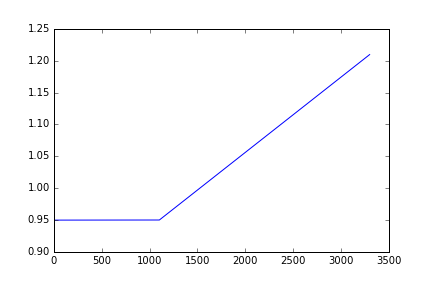

In [5]:
l = np.zeros([len(t), 1])
v = np.zeros([len(t), 1])
a = np.zeros([len(t), 1])
l[0:len(t)/3] = 0.95
v[0:len(t)/3] = 0
a[0:len(t)/3] = 0
l[len(t)/3:3*len(t)/3,0] = 0.95 + 0.118*(t[len(t)/3:3*len(t)/3]/1000 - 1.1)
v[len(t)/3:3*len(t)/3,0] = 0.118/1000
a[len(t)/3:3*len(t)/3,0] = 0
l[3*len(t)/3:-1] = 1.08
v[3*len(t)/3:-1] = 0
a[3*len(t)/3:-1] = 0
plt.figure()
plt.plot(t,l)

In [6]:
tic = time.clock()
for i in xrange(0, len(t)-1):
    spindle.atualizeMuscleSpindle(t[i], l[i], v[i], 
                                  a[i], 70, 0)
    IaFR[i] = spindle.IaFR_Hz   
    fBag1[i] = spindle.fusimotorActivation[0]
    fBag2[i] = spindle.fusimotorActivation[1]
    fChain[i] = spindle.fusimotorActivation[2]
    TBag1[i] = spindle.fiberTension[0]
    TBag2[i] = spindle.fiberTension[2]
    TChain[i] = spindle.fiberTension[4]
toc = time.clock()

<IPython.core.display.Javascript object>


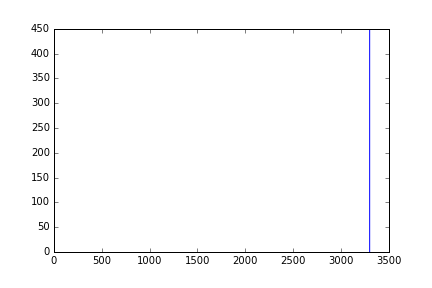

(0, 450)

In [7]:
plt.figure()
plt.plot(t, IaFR)
plt.ylim((0,450))

In [8]:
1000**0.3

7.943282347242814

<IPython.core.display.Javascript object>


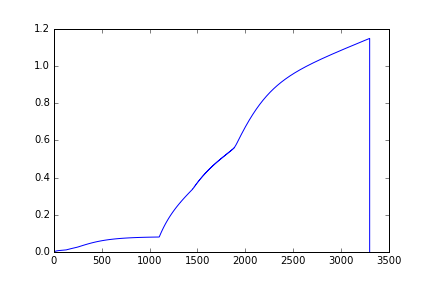

In [9]:
plt.figure()
plt.plot(t,TBag1)